# Data Loading and Exploratory Data Analysis

## Importing Libraries

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
# General
import os
import numpy as np

# Pandas
import pandas as pd

# Google Colab
from google.colab import drive

# Visualization (Seaborn & Matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Scikit-learn (SKLearn)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import (
    accuracy_score, mean_squared_error, mean_absolute_error,
    r2_score, classification_report, confusion_matrix
)
from sklearn.impute import SimpleImputer
from sklearn import svm
from xgboost import XGBRegressor



# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# SHAP
import shap

#StatModels
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data loading
We decide to load all the data, since we don´t know a priori if any kind of sampling is acceptable

In [ ]:


# Path to the folder containing CSV files
data_folder = '/Users/fidenciofernandez/OneDrive/IMT/M1S2/MachineLearning/Challenge2/HGS/Allinstances'

# Initialize an empty list to store individual DataFrames from each file
dataframes = []

# Iterate through the files in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)

        # Read the filename and extract it for use as column headers
        instance_name = os.path.splitext(filename)[0]

        # Read the CSV file and add its content to the list of DataFrames
        df = pd.read_csv(file_path, sep=";" , header=None)

        # Assign the filename as column headers
        df.columns = ['Instance Name', 'Solution Cost'] + [f'S{i}' for i in range(1, 19)]

        dataframes.append(df)

# Concatenate all DataFrames into one
complete_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the complete DataFrame
print(complete_df.head())


In [ ]:
# Drop the 'S7' column
df = complete_df.drop(columns=['S7'])

#Save the modified DataFrame to a CSV file with headers
complete_df.to_csv('modified_data.csv', index=False, sep=';')

In case is not the first run, a preprocesed CSV is loaded, including all the instances, except S7, that is identified as mistaken. This is due to the fact, that in the beginning of the work, at the data exploration stage, it has been noticed that the all values conatained in S7, were null values. it has then been decided to be deleted from the dataset(for efficiency purposes)

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/modified_data.csv"
df = pd.read_csv(path, sep=';')

# Tail to verify that we are processing 14 million lines
print(df.tail())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Instance Name  Solution Cost       S1       S2      S3      S4  \
14109509  XML100_2113_17          13681  239.254  102.927  0.2193  0.0908   
14109510  XML100_2113_17          13681  242.110  127.552  0.2197  0.1306   
14109511  XML100_2113_17          13681  212.116  118.468  0.1896  0.1194   
14109512  XML100_2113_17          13681  218.618  106.805  0.2133  0.1338   
14109513  XML100_2113_17          13681  220.144  126.425  0.2056  0.1078   

               S5       S6       S8      S9     S10      S11     S12     S13  \
14109509  452.583  164.331  304.083  0.2780  0.1347  513.583  0.2894  0.1447   
14109510  449.333  168.372  302.500  0.2748  0.1329  526.667  0.2894  0.1447   
14109511  471.333  166.852  294.667  0.2746  0.1367  457.833  0.3704  0.1852   
14109512  460.500  155.260  309.667  0.2846  0.1352  480.917  0.3704  0.1852   
14109513

## Missing values and highly correlated dropping

In [ ]:
import seaborn as sns
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

As previously said,  The first run of the dataset indicated that the S7 column was filled with null value. Since it's a full column, and the necessary data to compute and fill this column in our disposal, it has been decided, that this Column should be dropped out. and since the dataset is quiet voluminous, it has been totally droped out of the full dataset

Subesequently, when the same analysis (detection of null values is run) it indicates that the dataset doesn't contain any other null value, as shown above

In [ ]:
#Eliminate all the statistical S´s
nostat_df = df.drop(columns=['S2',"S4","S6","S14","S15","S17"])

These features have been dropped because, being a measure of the dispersion or spread of a feature's values, the standard deviation might bias the detection of linear relationship between feature.

Dropping these, will also help avoid redundancy issues.

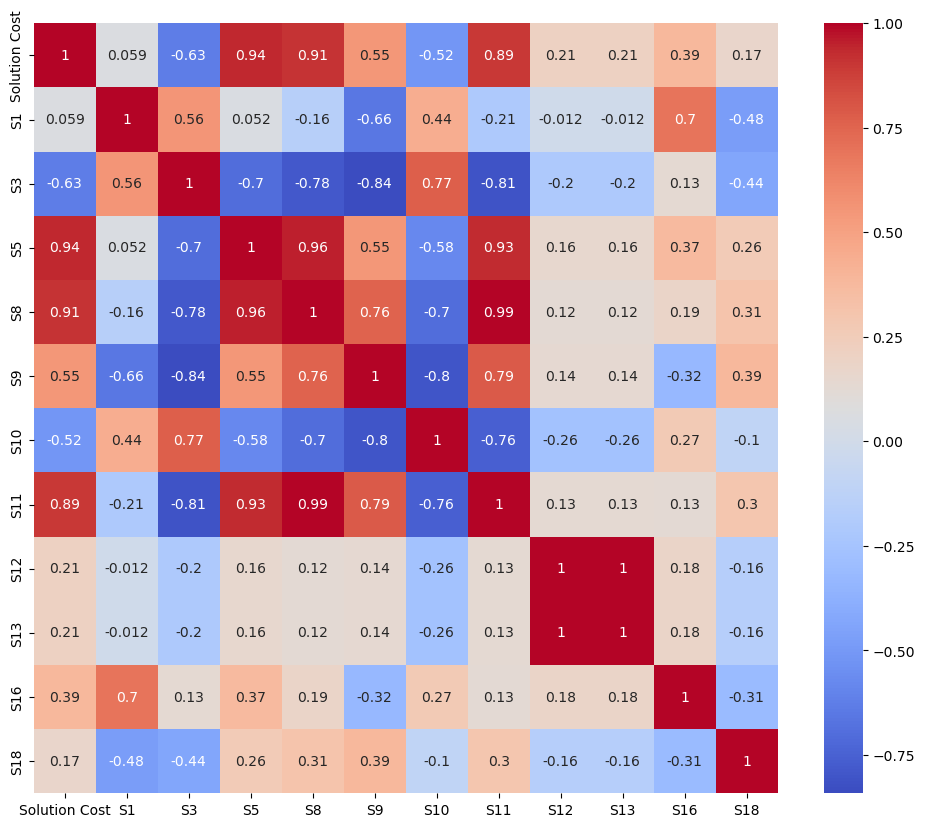

In [ ]:
# Correlation matrix
correlation_matrix = nostat_df.corr(method='pearson')
plt.figure(figsize=(12, 10))
# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
target_variable = 'Solution Cost'

# Calculate the Pearson correlation coefficients and sort them in descending order
correlation_with_target = nostat_df.corr()[target_variable].sort_values(ascending=False)

# Print the correlations
print("Correlation with the Target Variable:")
print(correlation_with_target)

<ipython-input-5-43c845bd6146>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = nostat_df.corr()[target_variable].sort_values(ascending=False)


Correlation with the Target Variable:
Solution Cost    1.000000
S5               0.936667
S8               0.912256
S11              0.894752
S9               0.551346
S16              0.387145
S13              0.213385
S12              0.213364
S18              0.171649
S1               0.058614
S10             -0.516273
S3              -0.631101
Name: Solution Cost, dtype: float64


In the figure above, the degree of linearity between S12, and S13 is equal to one, and when computed against the Solution cost, It has been proved  that they prvide the same degree of information. So one of them has te be dropped

In [ ]:
nostat_df = nostat_df.drop(columns=['S13'])

## Normalization
We normalize the data, so we can see a general behaivor of the data set and explore possible correlations

In [ ]:
scaler = MinMaxScaler()

# Define the columns you want to normalize (excluding non-numeric columns if any)
columns_to_normalize = nostat_df.select_dtypes(include=['number']).columns

# Normalize the selected columns
normalized_data = scaler.fit_transform(nostat_df[columns_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
non_numeric_columns = nostat_df.select_dtypes(exclude=['number']).columns
normalized_df[non_numeric_columns] = nostat_df[non_numeric_columns]

# Now, df contains the normalized values for the selected columns

The features  of the dataset, have different scales. which might corrupt the proper analysis and manipulation of the data. The avoid such problems, the data has been normalized as above.

As explained in the problem description, we have 4 different configurations (in relationship with the location of the depot). To avoid any missunderstanding, and to better explain the data, this has been analysed based on the groups

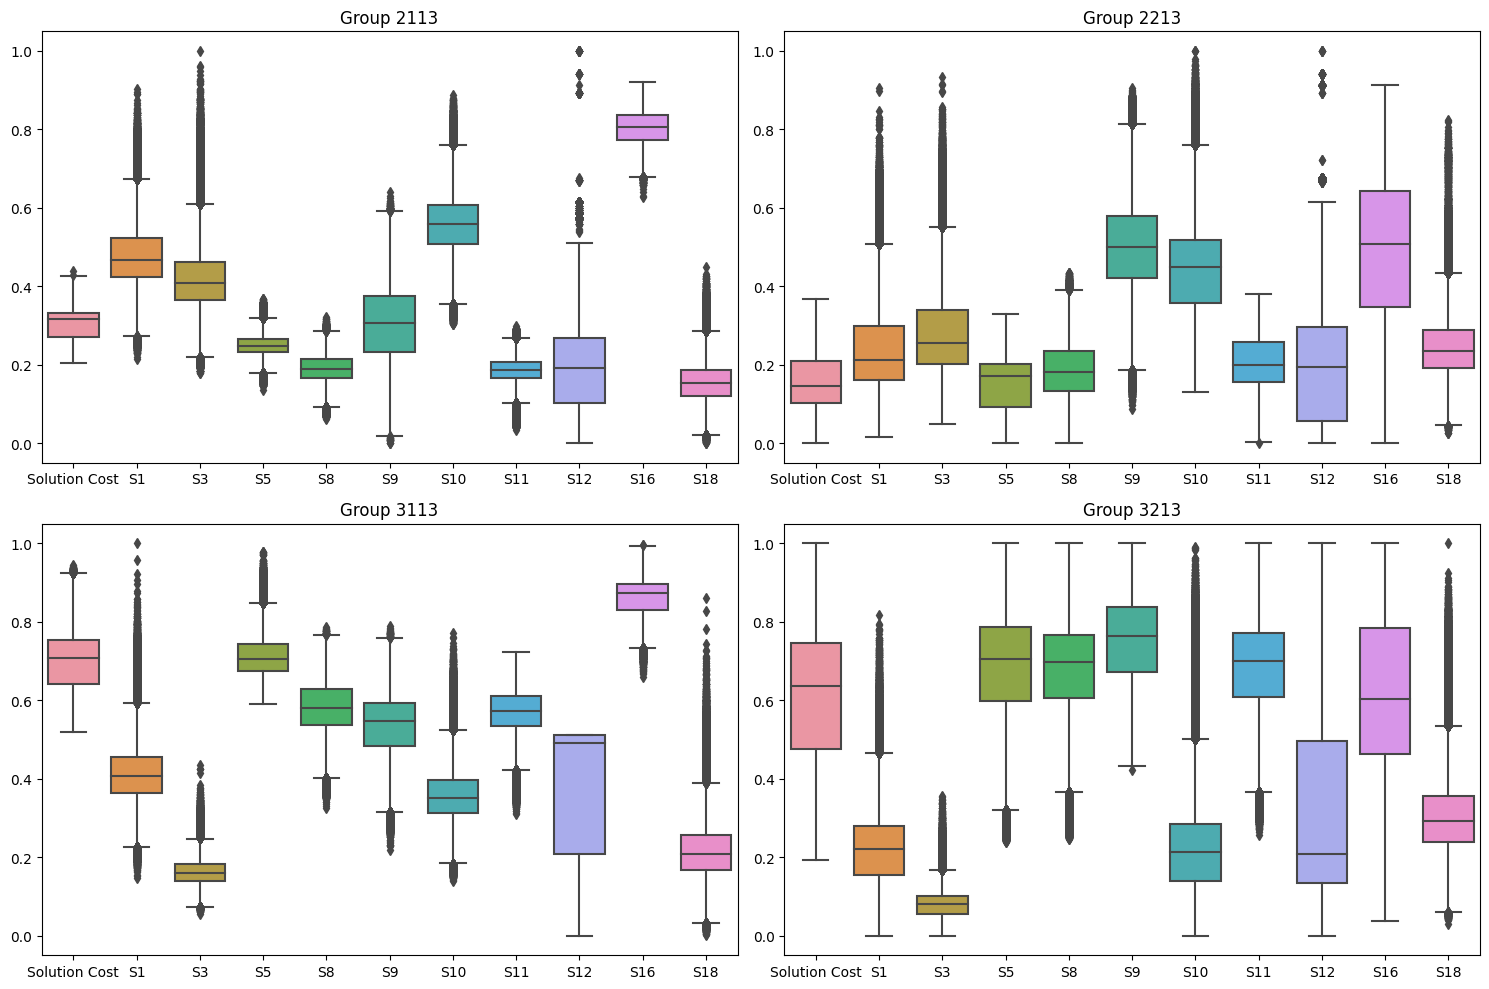

In [ ]:
# Create a box plot for each group
plt.figure(figsize=(15, 10))  # Set the figure size

# Iterate through the groups
groups = ['2113', '2213', '3113', '3213']
for group in groups:
    plt.subplot(2, 2, groups.index(group) + 1)  # Create subplots
    plt.title(f'Group {group}')

    # Filter the DataFrame for the specific group
    group_df = normalized_df[normalized_df['Instance Name'].str.contains(group)]

    # Create box plots for all columns except 'Instance Name' and 'Solution Cost'
    sns.boxplot(data=group_df.drop(columns=['Instance Name',]), orient='v')

plt.tight_layout()
plt.savefig('BxPlt_S_PerGroup.png')
plt.show()


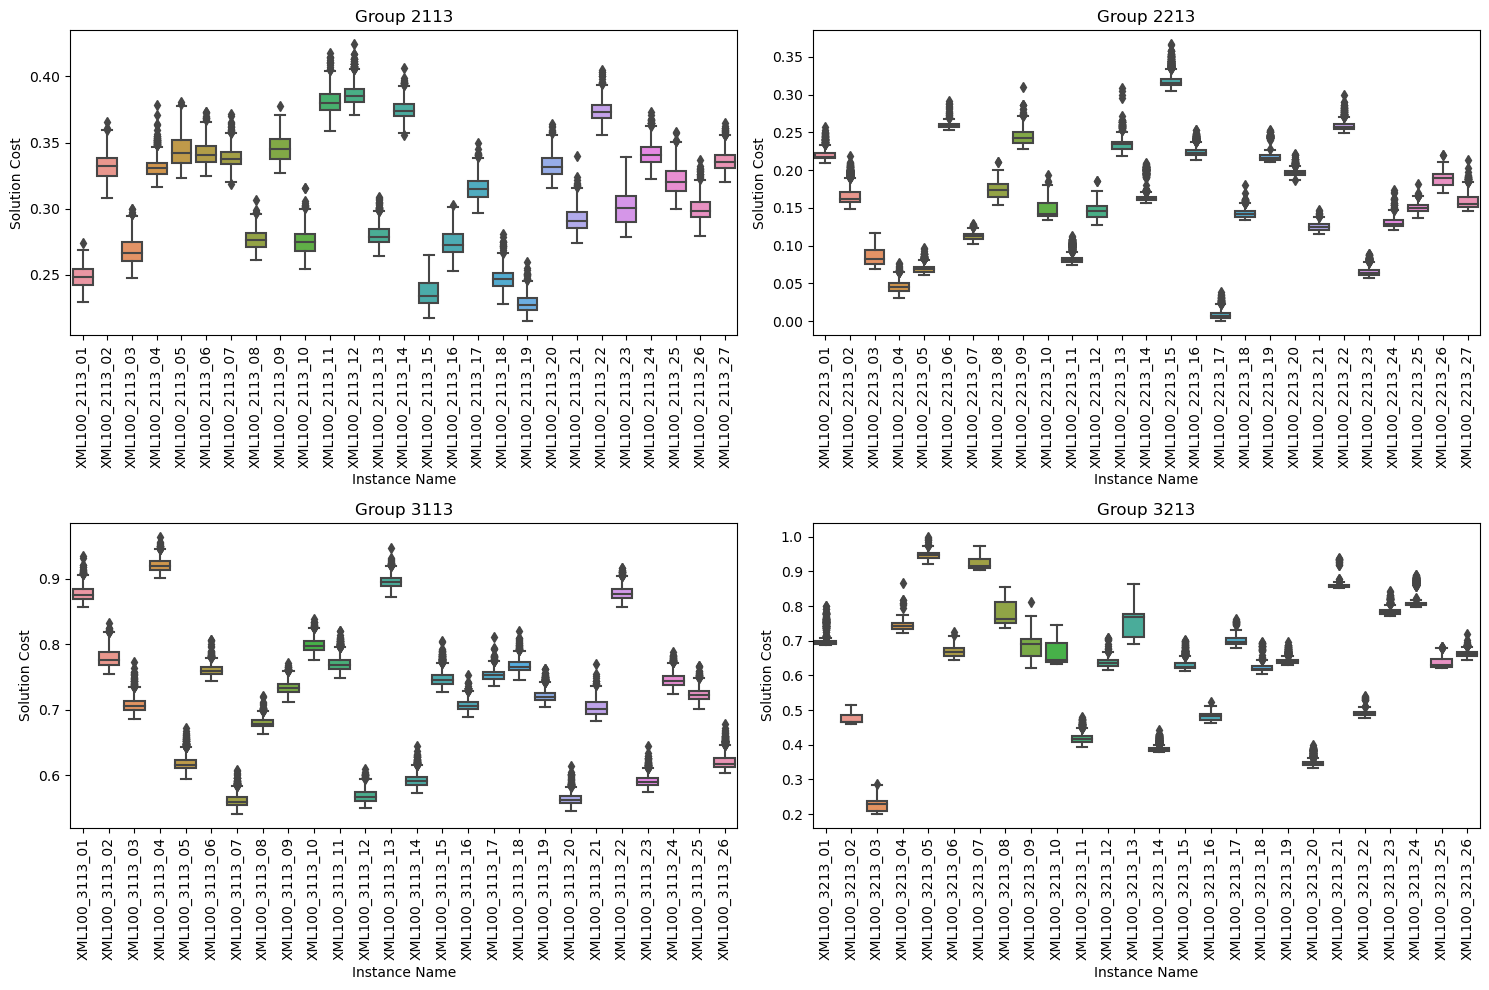

In [ ]:
# Create a boxplot for Solution Cost for each group
plt.figure(figsize=(15, 10))  # Set the figure size

# Iterate through the groups
groups = ['2113', '2213', '3113', '3213']
for group in groups:
    plt.subplot(2, 2, groups.index(group) + 1)  # Create subplots
    plt.title(f'Group {group}')

    # Filter the DataFrame for the specific group
    group_df = normalized_df[normalized_df['Instance Name'].str.contains(group)]

    # Create a boxplot for the "Solution Cost" column
    sns.boxplot(data=group_df, x='Instance Name', y='Solution Cost')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()

# Save the plot as an image file (e.g., 'solution_cost_boxplots.png')
plt.savefig('solution_cost_boxplots.png')

# Display the plot
plt.show()


## Sampling strategy

The dataset is quiet vouluminous, this makes it hard to efficienlty run an ML model, yet less to compute and compare different models. A sampling strategy has hence been adopted.

In [ ]:
# List to store results
summary_results = []

# Define different sampling percentages
sample_percentages = [0.99,0.1, 0.05, 0.01,0.001,0.0001,0.001]

# Iterating over different sampling percentages
for sample_percentage in sample_percentages:
    # Apply stratified sampling based on 'Instance Name'
    sampled_df, _ = train_test_split(nostat_df, test_size=1 - sample_percentage, stratify=nostat_df['Instance Name'])

    # Calculate summary metrics for the entire sample
    mean_solution_cost = sampled_df['Solution Cost'].mean()
    std_solution_cost = sampled_df['Solution Cost'].std()
    max_solution_cost = sampled_df['Solution Cost'].max()
    min_solution_cost = sampled_df['Solution Cost'].min()

    # Create a dictionary with results for the current sample percentage
    result_dict = {
        'Sample Percentage': sample_percentage,
        'Mean Solution Cost': mean_solution_cost,
        'Std Solution Cost': std_solution_cost,
        'Max Solution Cost': max_solution_cost,
        'Min Solution Cost': min_solution_cost,

    }

    # Append results to the list
    summary_results.append(result_dict)

# Create a DataFrame from the results list
summary_df = pd.DataFrame(summary_results)

# Print the DataFrame
print(summary_df)


   Sample Percentage  Mean Solution Cost  Std Solution Cost  \
0             0.9900        17237.758200        5029.207493   
1             0.1000        17237.917210        5029.469393   
2             0.0500        17237.991569        5029.733449   
3             0.0100        17238.025848        5028.379146   
4             0.0010        17239.764760        5028.850203   
5             0.0001        17244.472340        5036.059851   
6             0.0010        17238.237366        5029.943409   

   Max Solution Cost  Min Solution Cost  
0              27588               7766  
1              27356               7769  
2              27132               7766  
3              26883               7774  
4              26599               7780  
5              26619               7795  
6              26744               7782  


At the beginning, different sampling pourcentages have been tested, subsequenlty the mean, max, min, standard deviation have been computed to see to which extend we can sample, without loosing infomations.

The result displayed above, shows that we won't loose information to the extent of 0.001

We hence settled to choose a 0.005 sampling rate.

In [ ]:
# Specify the percentage of sampling you want for each instance_name
sample_percentage = 0.005  # Adjust this value as needed

# Sample within each group defined by 'Instance Name' and reset index
sampled_df = normalized_df.groupby('Instance Name').apply(lambda group: group.sample(frac=sample_percentage,random_state=42)).reset_index(drop=True)
sampled_df



,Solution Cost,S1,S3,S5,S8,S9,S10,S11,S12,S16,S18,Instance Name
0,0.250429,0.433095,0.360867,0.315927,0.188166,0.210414,0.558757,0.155695,0.014701,0.854670,0.173881,XML100_2113_01
1,0.245434,0.397106,0.299077,0.315429,0.163808,0.156925,0.546150,0.143165,0.036904,0.859064,0.170726,XML100_2113_01
2,0.231460,0.502861,0.406351,0.242024,0.133604,0.202976,0.417380,0.152398,0.490849,0.848382,0.091799,XML100_2113_01
3,0.249319,0.526343,0.460845,0.275673,0.167949,0.258944,0.409725,0.135971,0.490849,0.819166,0.141407,XML100_2113_01
4,0.237817,0.428371,0.402274,0.280160,0.103035,0.142756,0.453399,0.105695,0.490849,0.822240,0.173207,XML100_2113_01
...,...,...,...,...,...,...,...,...,...,...,...,...
70543,0.634144,0.243902,0.046771,0.821037,0.824886,0.819341,0.133724,0.846703,0.196520,0.619768,0.244858,XML100_3213_26
70544,0.642468,0.302977,0.073160,0.825150,0.827200,0.808006,0.131923,0.852038,0.022202,0.554175,0.280652,XML100_3213_26
70545,0.641963,0.280338,0.081957,0.832129,0.835969,0.817570,0.137776,0.857374,0.033903,0.575916,0.281682,XML100_3213_26
70546,0.644890,0.266477,0.078738,0.831505,0.840110,0.818987,0.124268,0.857794,0.014701,0.563322,0.246626,XML100_3213_26


## PCA, VIF and Correlation anaysis


In [ ]:

numeric_columns = normalized_df.select_dtypes(include=['number']).columns
features_df = normalized_df[numeric_columns].drop(columns=['Solution Cost'])

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(features_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC 1', 'PC 2',"PC3","PC4","PC5"])
final_df = pd.concat([pca_df, normalized_df[['Instance Name', 'Solution Cost']]], axis=1)

# Now, final_df contains the original columns along with the PCA components


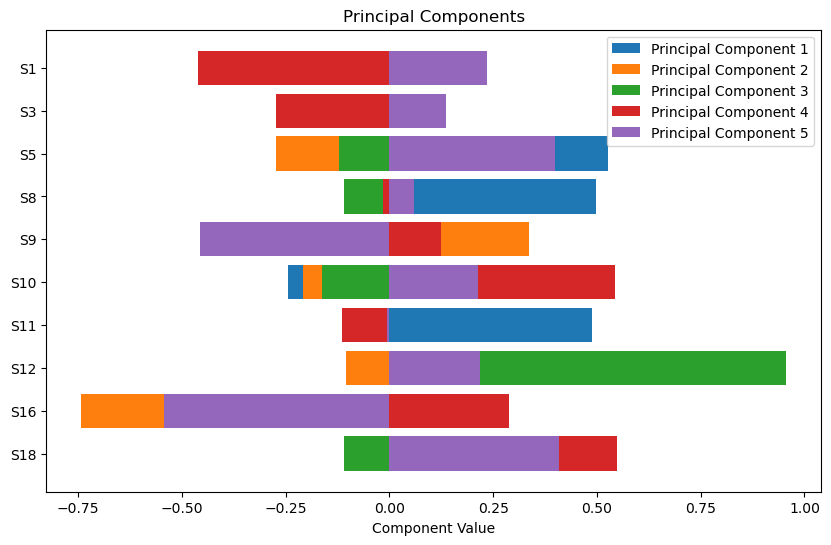

In [ ]:


n_components = pca.components_.shape[0]
features = normalized_df.drop(['Instance Name', 'Solution Cost'], axis=1).columns

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each principal component separately
for i in range(n_components):
    ax.barh(features, pca.components_[i], label=f'Principal Component {i + 1}')

ax.set_xlabel('Component Value')
ax.set_title('Principal Components')

# Invert y-axis for better readability
ax.invert_yaxis()
ax.legend()
plt.show()


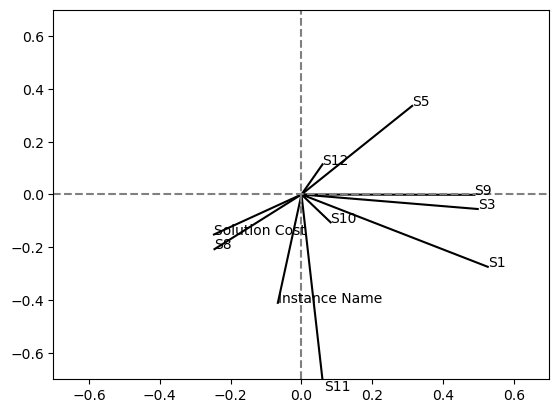

In [ ]:
components = pca.components_

for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, nostat_df.columns[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

From the above 2 figues, the PCA, show that the features are pretty much correlated between one another, which makes kin if sence, as some of them mathematically speaking, are computed using  others. To further understand and explain  these relationships, a Variance  inflation factor is going to be run


In [ ]:
# Separate the target variable if it's included
target_variable = normalized_df['Solution Cost']
df_vif = normalized_df.drop(columns=['Solution Cost','Instance Name'])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Print or display the VIF values
print("VIF Analysis:")
print(vif_data)

VIF Analysis:
  Variable         VIF
0       S1   41.776758
1       S3   27.768905
2       S5  302.646254
3       S8  656.863175
4       S9   96.216785
5      S10   52.557805
6      S11  706.107861
7      S12    4.467456
8      S16   43.977274
9      S18   19.489375


The Variance inflation factor is used in  to detect multicollinearity , by doing so, we aim to identify the features that monopolize the explainability of the data. Variables like S8, S11, and S5 have extremely high VIF values (656.86, 706.11, and 302.65, respectively). This suggests a strong correlation between these variables and other predictors in the model, potentially indicating multicollinearity issues. It might be interesting to drop them out, in further steps

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# converts the DataFrame to a string with the customized format
formatted_df = vif_data.to_string()

# Restore the default setting to avoid affecting other DataFrames
pd.options.display.float_format = None

# Print the formatted DataFrame
print(formatted_df)

# Regression Analysis
After we have all the data exploration, and we realize there are some columns very highly correlated, we decide, at first sight, to run the models without droping any, but keeping into consideration that some columns may affect the output quality of our models.

## Linear regression Modeling

We include a linear regression, to see if we can find a simple linear relation between the variables and the Solution Cost.

In [ ]:
target_variable="Solution Cost"
# Separate features (X) and the target variable (y)
X = sampled_df.drop([target_variable,"Instance Name"], axis=1)
y = sampled_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Linear Regression model
LR_model = LinearRegression()

# Fit the model on the training data
LR_model.fit(X_train, y_train)

# Predict the target variable on the test data
LRy_pred = LR_model.predict(X_test)


# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, LRy_pred)
print("Mean Absolute Error:", mae)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, LRy_pred)/(sampled_df[target_variable].max() - sampled_df[target_variable].min())
print("Mean Squared Error:", mse)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate the R-squared (R2) coefficient
r2 = r2_score(y_test, LRy_pred)
print("R-squared (R2) Score:", r2)


Mean Absolute Error: 0.05686336493808607
Mean Squared Error: 0.005227462695494593
Root Mean Squared Error: 0.0723011942881623
R-squared (R2) Score: 0.9222296945994323


## Random Forest Regressor


In [ ]:
target_variable = 'Solution Cost'

# Separate features (X) and the target variable (y)
X = sampled_df.drop([target_variable, "Instance Name","S12", "S5","S8"], axis=1) #This variables were dropped after having very high importance in the RF and VIF
y = sampled_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
# Create a RandomForestRegressor
RF_model = RandomForestRegressor()

# Fit the model on your training data
RF_model.fit(X_train, y_train)

# Get feature importances
feature_importances = RF_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

RFy_pred = RF_model.predict(X_test)
mse = mean_squared_error(y_test, RFy_pred)
r2 = r2_score(y_test, RFy_pred)

# Imprimir las métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')
# Print or visualize the feature importances
print("Feature Importances:")
print(feature_importance_df)


Mean Squared Error (MSE): 0.00
R-squared (R^2): 1.00
Feature Importances:
  Feature  Importance
4     S11    0.873618
5     S16    0.079733
2      S9    0.023319
3     S10    0.008262
6     S18    0.005147
0      S1    0.005120
1      S3    0.004801


## SVM Regression

In [ ]:
X = sampled_df.drop([target_variable,"Instance Name"], axis=1)
y = sampled_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = svm.SVR(kernel='poly', C=1.0, epsilon=0.1, verbose=True)

svm_model.fit(X_train, y_train)

svmy_pred = svm_model.predict(X_test)

svmmse = mean_squared_error(y_test, svmy_pred)
print(f'Erreur quadratique moyenne MSE du modèle SVR : {svmmse}')

[LibSVM]Erreur quadratique moyenne MSE du modèle SVR : 0.0025200041185962554


In [ ]:
# manipuler les hyperparamètres du SVM pour améliorer la performance sur les 10%

X = sampled_df.drop(['Solution Cost', 'Instance Name'], axis=1)
y = sampled_df['Solution Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = svm.SVR()

param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 10, 100], 'gamma': [0.1, 1, 10]}

best_model = None
best_mse = float('inf')

# Boucle sur les différentes combinaisons d'hyperparamètres
for kernel in param_grid['kernel']:
    for C in param_grid['C']:
        for gamma in param_grid['gamma']:
            # Construction du nom du modèle
            model_name = f'SVM_{kernel}_C_{C}_gamma_{gamma}'

            # Initialisation du modèle SVM avec les hyperparamètres
            svm_model = svm.SVR(kernel=kernel, C=C, gamma=gamma)

            # Entraînement du modèle
            svm_model.fit(X_train, y_train)

            # Prédictions sur l'ensemble de test
            y_pred = svm_model.predict(X_test)

            # Évaluation de la performance avec l'erreur quadratique moyenne (MSE)
            mse = mean_squared_error(y_test, y_pred)

            # Comparaison avec la meilleure MSE actuelle
            if mse < best_mse:
                best_mse = mse
                best_model = svm_model

# Utilisation du meilleur modèle pour des prédictions supplémentaires
y_pred_best_model = best_model.predict(X_test)

# Affichage de la MSE du meilleur modèle
print(f'Meilleur modèle {model_name} - Erreur moyenne quadratique: {best_mse}')

The Above programme, is costructed to choose the best model (hyperparameters) among the SVMs, and returns the best out of them. But it too computationally consuming,  So we won't run it

## Gradient Boosting Regressor

In [ ]:
# Create a GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()

# Fit the model on your training data
GBR_model.fit(X_train, y_train)

# Get feature importances
feature_importances = GBR_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
GBRy_pred = GBR_model.predict(X_test)
GBRmse = mean_squared_error(y_test, GBRy_pred)
# Print or visualize the feature importances
print("MSE: GBR model: ",mse)
print("Feature Importances:")
print(feature_importance_df)

MSE: GBR model:  0.0002763214156488836
Feature Importances:
  Feature  Importance
2      S5    0.853666
7     S12    0.038919
3      S8    0.033493
6     S11    0.028846
8     S16    0.026298
4      S9    0.013080
5     S10    0.002735
1      S3    0.002477
0      S1    0.000343
9     S18    0.000142


## XGBRegressor


In [ ]:
# Create an XGBRegressor
XGBR_model = XGBRegressor()

# Fit the model on your training data
XGBR_model.fit(X_train, y_train)

# Get feature importances
feature_importances = XGBR_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
XGBRy_pred = XGBR_model.predict(X_test)
XGBRmse = mean_squared_error(y_test, XGBRy_pred)
# Print or visualize the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
  Feature  Importance
2      S5    0.850192
7     S12    0.033039
4      S9    0.032918
8     S16    0.027439
6     S11    0.023419
3      S8    0.017534
1      S3    0.007064
5     S10    0.005133
9     S18    0.001651
0      S1    0.001611


## SGDRegressor

In [ ]:
# Create an SGDRegressor
SGDR_model = SGDRegressor(max_iter=1000, random_state=42)

# Fit the model on your training data
SGDR_model.fit(X_train, y_train)

# Print the coefficients with feature names, sorted by absolute value in descending order
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': SGDR_model.coef_})
coef_df['AbsoluteCoefficient'] = coef_df['Coefficient'].abs()  # Add a column for absolute values
coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Print or visualize the sorted coefficients
print("Sorted Coefficients:")
print(coef_df[['Feature', 'Coefficient']])

# Evaluate the model on the test set
SGDRy_pred = SGDR_model.predict(X_test)
SGDRmse = mean_squared_error(y_test, SGDRy_pred)
SGDRr2 = r2_score(y_test, SGDRy_pred)
# Print or visualize the feature importances
print("MSE: SGDR model: ",SGDRmse)
print("R Squared test: ", SGDRr2 )

Sorted Coefficients:
  Feature  Coefficient
2      S5     0.396477
3      S8     0.316125
6     S11     0.294575
5     S10     0.152704
7     S12     0.098724
9     S18    -0.089047
8     S16     0.084431
0      S1     0.061393
1      S3     0.018520
4      S9     0.006834
MSE: SGDR model:  0.006117858388330366
R Squared test:  0.9043354366684646


## Multi Layer Perceptron (Keras)


In [ ]:
MLP_model = keras.Sequential([
    layers.Dense(33, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(66, activation='relu'),
    layers.Dense(1)  # Output layer for regression task
])

# Compile the model
MLP_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training the model and saving it
MLP_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)
# time to model.fit 2 epochs and batch_size 32 : 3min
MLPy_pred = MLP_model.predict(X_test)
#Metrics
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, MLPy_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, MLPy_pred)}")
# Save the entire model to a HDF5 file
MLP_model.save("33_66_1_relu_2epoc_32batch_.h5")

Epoch 1/2
1411/1411 [==============================] - 15s 8ms/step - loss: 0.0085 - val_loss: 0.0020
Epoch 2/2
441/441 [==============================] - 2s 4ms/step
Root Mean Squared Error (RMSE): 0.03738108374399262
Mean Absolute Error (MAE): 0.0273946458738146


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Convolutional Neural Network

In [ ]:
# Reshape features for CNN input (assuming a 2D structure)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_cnn).float()
y_train_tensor = torch.from_numpy(y_train.values).float()
X_test_tensor = torch.from_numpy(X_test_cnn).float()
y_test_tensor = torch.from_numpy(y_test.values).float()

# Hyperparameters
batch_size = 32
learning_rate = 0.005
epochs = 5

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)





In [ ]:
# CNN Main
class CNN(nn.Module):
    def __init__(self, in_channels, sequence_length):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        # Calculate the output size after convolutional layers
        conv_output_size = self._get_conv_output_size(in_channels, sequence_length)
        self.fc1 = nn.Linear(conv_output_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def _get_conv_output_size(self, in_channels, sequence_length):
        # Create a tensor with a single batch for shape inference
        x = torch.zeros((1, in_channels, sequence_length))
        # Pass the tensor through the convolutional layers
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        # Calculate the output size after convolutions
        return x.view(1, -1).size(1)

# Instantiate the CNN model
CNN_model = CNN(in_channels=X_train_tensor.shape[1], sequence_length=X_train_tensor.shape[2])



In [ ]:

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
CNN_model.to(device)

# Convert data to GPU tensors
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Loss Function
criterion = nn.MSELoss().to(device)
optimizer = optim.Adam(CNN_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    CNN_model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = CNN_model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN_model.to(device)

# Move the input tensor to the GPU
X_test_tensor = X_test_tensor.to(device)

# Make predictions on the test set
CNN_model.eval()
CNNy_pred_tensor = CNN_model(X_test_tensor)
CNNy_pred = CNNy_pred_tensor.cpu().detach().numpy()

# Metrics
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, CNNy_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, CNNy_pred)}")

Epoch [1/5], Loss: 0.0027
Epoch [2/5], Loss: 0.0011
Epoch [3/5], Loss: 0.0008
Epoch [4/5], Loss: 0.0007
Epoch [5/5], Loss: 0.0007
Root Mean Squared Error (RMSE): 0.02907653388618589
Mean Absolute Error (MAE): 0.018822256898874026


In [ ]:
# We can load a pretrained model


MLP_model = load_model("33_66_1_relu_2epoc_32batch_.h5")

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


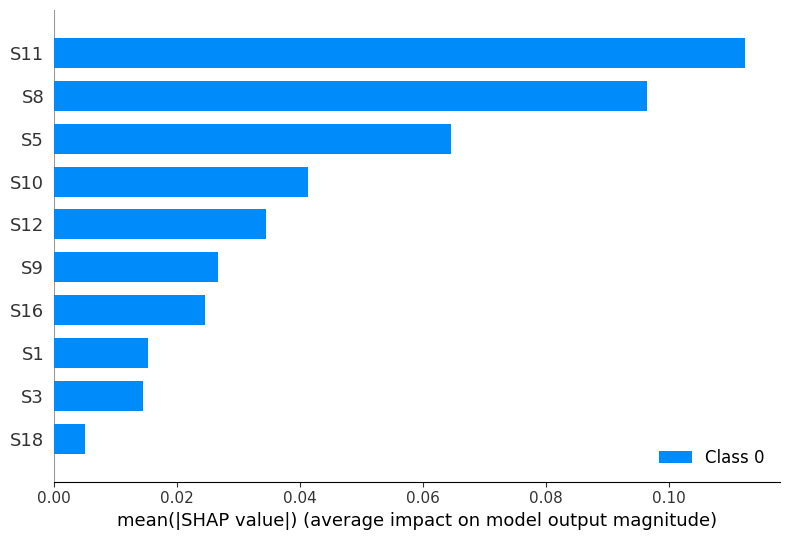

In [ ]:
#SHAP explicability and interpretability technique is applied in NN for understanding the features
X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else np.array(X_train)

# DeepExplainer
explainer = shap.DeepExplainer(MLP_model, data=shap.sample(X_train_array, 1000))  # Size adjustment is possible
# SHAP values
shap_values = explainer.shap_values(X_train_array)
shap.summary_plot(shap_values, X_train.iloc[:100, :])

## Model comparaison

We perform a Model comparision, to see the predicted vs the real y and compare the models.


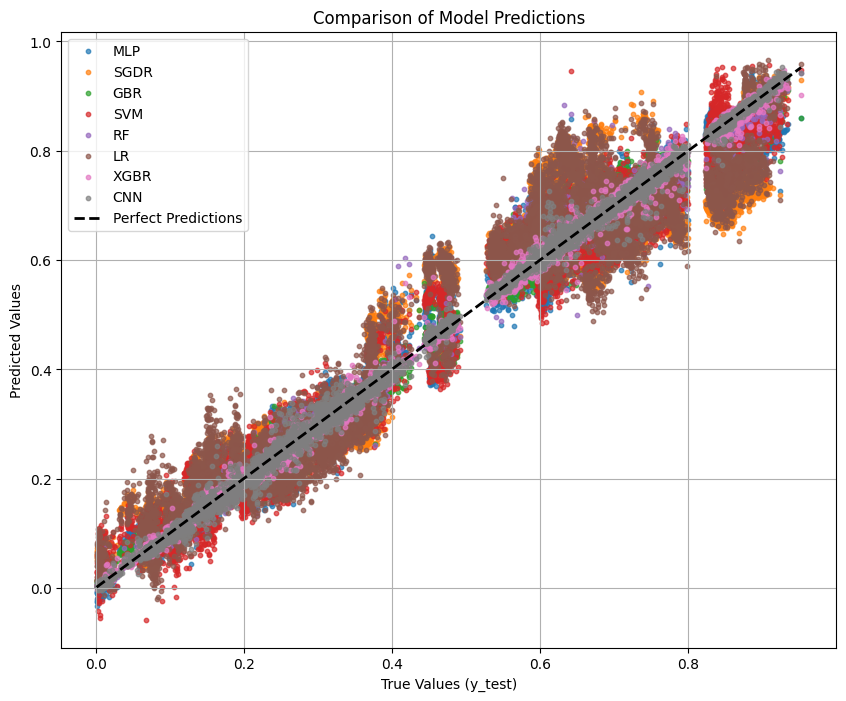

In [ ]:
# List of models and their predicted values
models = [MLP_model, SGDR_model, GBR_model, svm_model, RF_model,LR_model, XGBR_model,CNN_model]
predictions = [MLPy_pred, SGDRy_pred, GBRy_pred, svmy_pred, RFy_pred, LRy_pred, XGBRy_pred,CNNy_pred]
model_names = ['MLP', 'SGDR', 'GBR', 'SVM', 'RF',"LR", "XGBR","CNN"]

# Plotting
plt.figure(figsize=(10, 8))

for model_name, y_pred in zip(model_names, predictions):
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.7,s=10)

# Add a diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')

# Set plot labels and title
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.grid(True)
plt.show()

The figure Above, shows that all models are able to predict y quiet well. Basically all models, don't produce significant outliers

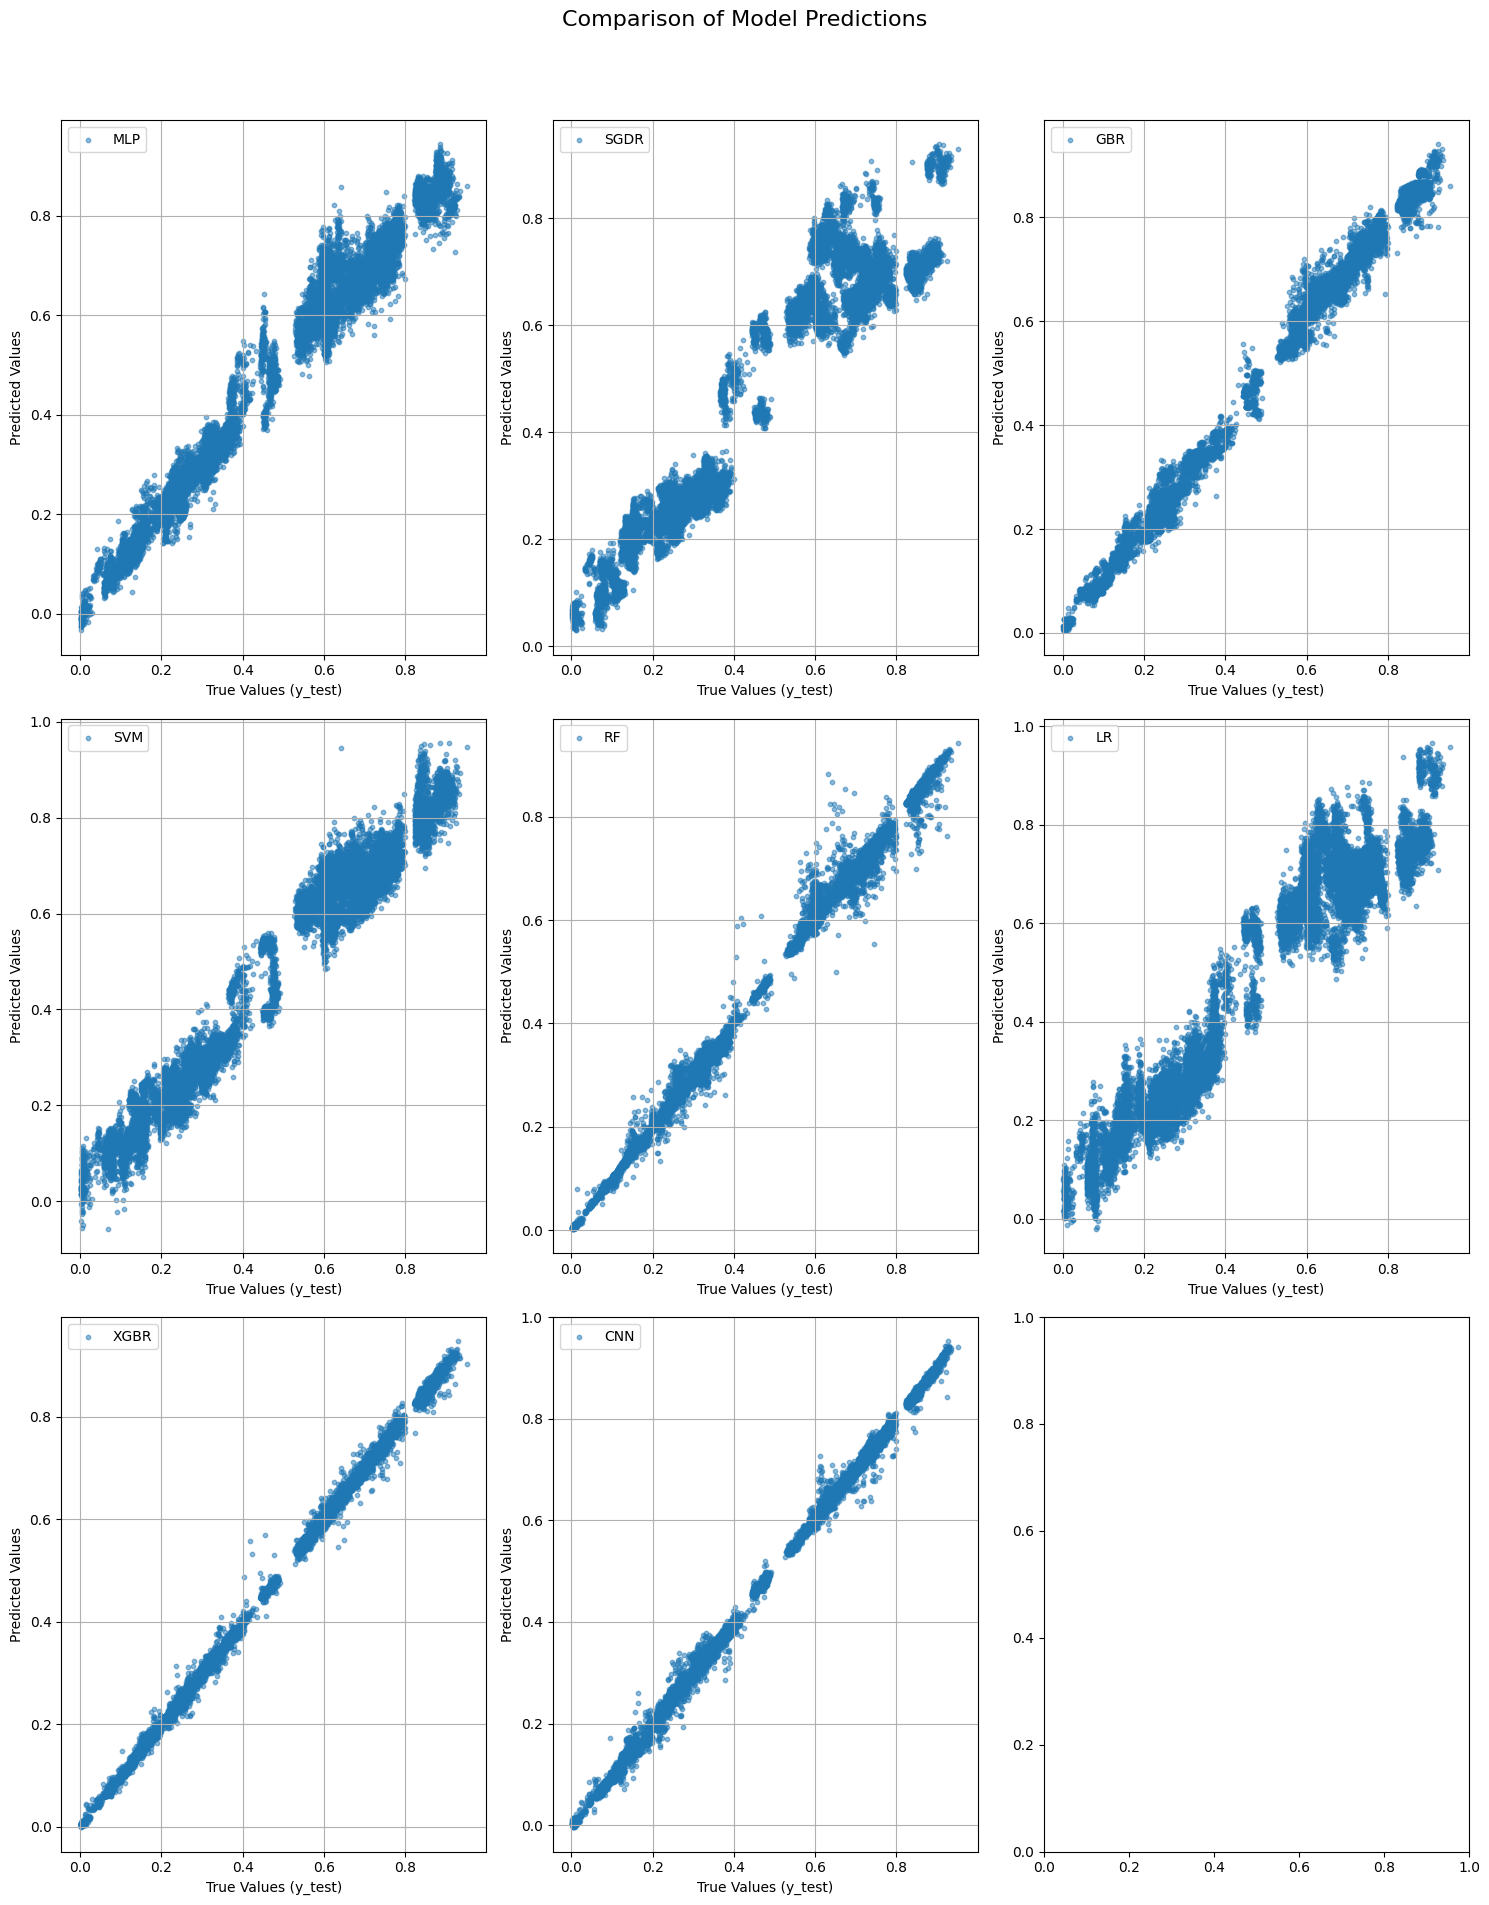

In [ ]:

# List of models and their predicted values
models = [MLP_model, SGDR_model, GBR_model, svm_model, RF_model,LR_model, XGBR_model,CNN_model]
predictions = [MLPy_pred, SGDRy_pred, GBRy_pred, svmy_pred, RFy_pred, LRy_pred, XGBRy_pred,CNNy_pred]
model_names = ['MLP', 'SGDR', 'GBR', 'SVM', 'RF',"LR", "XGBR","CNN"]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
fig.suptitle('Comparison of Model Predictions', fontsize=16)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plotting one model at a time
for model_name, y_pred, ax in zip(model_names, predictions, axes):
    # Scatter plot with smaller dots
    ax.scatter(y_test, y_pred, label=model_name, alpha=0.5, s=10)

    # Set subplot labels
    ax.set_xlabel('True Values (y_test)')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The figure above, takes a closer look into the prediction of each of the models seperatly. And it show, visually, that XGBR, Random Forest and Convolutional Neural Network Predict the best values

# Cross Validation of best models

## Preparing and sampling of Validation Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = nostat_df.select_dtypes(include=['number']).columns

#SELECT THE FRACTION FOR THE CROSS VALIDATION (CV) frac=

cv_normalized_data = scaler.fit_transform(nostat_df.groupby('Instance Name').apply(lambda group: group.sample(frac=0.05,random_state=39)).reset_index(drop=True)[columns_to_normalize])
cv_normalized_df = pd.DataFrame(cv_normalized_data, columns=columns_to_normalize)
non_numeric_columns = nostat_df.select_dtypes(exclude=['number']).columns
cv_normalized_df[non_numeric_columns] = nostat_df[non_numeric_columns]
cv_normalized_df

,Solution Cost,S1,S3,S5,S8,S9,S10,S11,S12,S16,S18,Instance Name
0,0.247682,0.526493,0.373543,0.290821,0.137410,0.210848,0.549713,0.122449,0.490849,0.827750,0.179938,XML100_3213_16
1,0.246119,0.615600,0.446637,0.268582,0.135311,0.219109,0.585564,0.124397,0.490849,0.816383,0.185123,XML100_3213_16
2,0.251745,0.527259,0.374888,0.290170,0.169510,0.228807,0.613767,0.142116,0.101710,0.861140,0.203223,XML100_3213_16
3,0.238356,0.589801,0.475561,0.257527,0.144447,0.249282,0.517686,0.122023,0.490849,0.825046,0.152536,XML100_3213_16
4,0.240857,0.616045,0.388565,0.255056,0.152596,0.256106,0.462715,0.147657,0.490849,0.839794,0.102174,XML100_3213_16
...,...,...,...,...,...,...,...,...,...,...,...,...
705468,0.662082,0.199409,0.042601,0.867346,0.833598,0.812141,0.108987,0.867736,0.196520,0.578892,0.288067,XML100_3213_03
705469,0.662759,0.311264,0.053139,0.837824,0.818536,0.799210,0.134799,0.857019,0.058506,0.573712,0.301724,XML100_3213_03
705470,0.660727,0.379827,0.088789,0.840165,0.832610,0.827586,0.104685,0.865057,0.102910,0.578243,0.245305,XML100_3213_03
705471,0.682453,0.324863,0.051345,0.865655,0.874463,0.844468,0.081262,0.902199,0.490849,0.656015,0.168829,XML100_3213_03


## Random Forest Regressor Validation

In [ ]:
Xcv = cv_normalized_df.drop([target_variable, "Instance Name","S12", "S5","S8"], axis=1)
ycv = cv_normalized_df[target_variable]
# Perform cross-validation (e.g., 5-fold cross-validation) and calculate MSE
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcv, ycv, test_size=0.6, random_state=44)

# Make predictions on the test set
RFy_predcv = RF_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, RFy_predcv))
mae = mean_absolute_error(y_test, RFy_predcv)

# Print the cross-validation MSE scores
print("MSE Scores:", rmse)
print("MAE Random Forest:", mae)


MSE Scores: 0.02660194174911805
MAE Random Forest: 0.018399331123948984


## MLP, SGDR, GBR, SVM, XGBR, LR Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def manual_cross_validation(model, X, y, test_size=0.6, random_state=None):
    """
    Perform manual cross-validation on a given model.

    Parameters:
    - model: The machine learning model to use for predictions.
    - X: The feature matrix.
    - y: The target variable.
    - test_size: The proportion of the data to include in the test split.
    - random_state: Seed for random number generation.

    Returns:
    - Dictionary containing evaluation metrics.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Return the metrics in a dictionary
    metrics = {'RMSE': rmse, 'MAE': mae}
    return metrics

Xcv = cv_normalized_df.drop([target_variable, "Instance Name"], axis=1)
ycv = cv_normalized_df[target_variable]
# List of models to evaluate
models = [MLP_model, SGDR_model, GBR_model, svm_model, XGBR_model, LR_model] #RF and CNN out, since the inputs are not the same and has a different size

# Results dictionary to store metrics for each model
results = {}

# Perform manual cross-validation for each model
for model in models:
    model_name = type(model).__name__  # Get the model name
    model_results = manual_cross_validation(model, Xcv, ycv, random_state=83)
    results[model_name] = model_results

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print()


13228/13228 [==============================] - 26s 2ms/step
Sequential Metrics:
  RMSE: 0.0442
  MAE: 0.0344

SGDRegressor Metrics:
  RMSE: 0.0810
  MAE: 0.0657

GradientBoostingRegressor Metrics:
  RMSE: 0.0262
  MAE: 0.0195

SVR Metrics:
  RMSE: 0.0600
  MAE: 0.0517

XGBRegressor Metrics:
  RMSE: 0.0137
  MAE: 0.0099

LinearRegression Metrics:
  RMSE: 0.0730
  MAE: 0.0589



**Root Mean Squared Error (RMSE):**RMSE measures the average magnitude of the errors between predicted and actual values

With lower RMSE Values, GradientBoostingRegressor and XGBRegressor, have a better accuracy as they have a  smaller average error between predicted and actual values.

**Mean Absolute Error (MAE):**MAE measures the average absolute errors between predicted and actual values.

The difference between MAE and RMSE, is that the first one computes the  average absolute error between predicted and actual values, not the average one. The compting of this, nevertheless confirms the above metioned results

# CLASSIFICATION PROBLEM


We perform a bigger sample, for exploring the distribution of the data and select the best alternative for the labeling ruling and distribution.

## Sampling

In [ ]:
clas_sample_percentage = 0.25  # Adjust this value as needed

# Sample within each group defined by 'Instance Name' and reset index
clas_sampled_df = nostat_df.groupby('Instance Name').apply(lambda group: group.sample(frac=clas_sample_percentage,random_state=25)).reset_index(drop=True)
clas_sampled_df

,Instance Name,Solution Cost,S1,S3,S5,S8,S9,S10,S11,S12,S16,S18
0,XML100_2113_01,12402,201.525,0.1864,529.7,293.7,0.2571,0.1416,426.7,0.3636,472.342,3.0750
1,XML100_2113_01,12371,202.641,0.1765,529.7,285.5,0.2507,0.1480,406.0,0.3636,474.226,3.2050
2,XML100_2113_01,12395,197.608,0.1665,529.7,289.8,0.2566,0.1512,392.7,0.3636,474.948,3.3200
3,XML100_2113_01,12376,203.951,0.1949,523.1,303.0,0.2505,0.1456,457.4,0.2339,488.929,3.0178
4,XML100_2113_01,12298,222.390,0.2016,489.7,284.6,0.2520,0.1308,465.0,0.3636,482.961,2.7600
...,...,...,...,...,...,...,...,...,...,...,...,...
3527372,XML100_3213_26,20352,153.247,0.0457,954.9,838.9,0.4152,0.0585,1608.6,0.2343,360.410,3.8475
3527373,XML100_3213_26,20361,107.103,0.0375,968.6,845.3,0.4161,0.0470,1644.8,0.2655,386.917,3.3556
3527374,XML100_3213_26,20297,112.424,0.0372,970.5,829.0,0.4097,0.0471,1631.5,0.2655,385.746,3.6650
3527375,XML100_3213_26,20244,143.843,0.0424,946.7,835.2,0.4167,0.0509,1611.5,0.3636,402.497,3.3850


In [ ]:
# List of groups
groups = ['2113', '2213', '3113', '3213']

# Create separate DataFrames for each group
group_dfs = {}
for group in groups:
    group_dfs[group] = clas_sampled_df[clas_sampled_df['Instance Name'].str.contains(group)]
    missing_values = group_dfs[group].isnull().sum()
    print("Missing Values:\n", missing_values)

# Print or do further analysis on each DataFrame
for group, df in group_dfs.items():
    print(f"\nGroup {group}:")
    print(df)


Missing Values:
 Instance Name    0
Solution Cost    0
S1               0
S3               0
S5               0
S8               0
S9               0
S10              0
S11              0
S12              0
S16              0
S18              0
dtype: int64
Missing Values:
 Instance Name    0
Solution Cost    0
S1               0
S3               0
S5               0
S8               0
S9               0
S10              0
S11              0
S12              0
S16              0
S18              0
dtype: int64
Missing Values:
 Instance Name    0
Solution Cost    0
S1               0
S3               0
S5               0
S8               0
S9               0
S10              0
S11              0
S12              0
S16              0
S18              0
dtype: int64
Missing Values:
 Instance Name    0
Solution Cost    0
S1               0
S3               0
S5               0
S8               0
S9               0
S10              0
S11              0
S12              0
S16              0


This above, shows that the dataset, doesn't contain null values either

## Normalizing

We decide to use a MinMAx normilazer, to pick the best result as 0 and the worst as 1, and distribute through each group, sice the conditions on each clustering were different, so if we want a generalizable model, we need to standarize each piece of data individualy with each maximums and minimums.


In [ ]:
# List of groups
groups = ['2113', '2213', '3113', '3213']

# Create an empty dictionary to store normalized DataFrames
normalized_dfs = {}

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Iterate over each group
for group in groups:
    # Get the DataFrame for the specific group
    group_df = group_dfs[group].copy()

    # Identify numeric columns
    columns_to_normalize = group_df.select_dtypes(include=['number']).columns

    # Separate 'Instance Name' column from numeric columns
    instance_name_column = group_df['Instance Name'].copy()
    group_df = group_df[columns_to_normalize].copy()

    # Apply normalization to the selected columns
    normalized_data = scaler.fit_transform(group_df)
    normalized_group_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

    # Include 'Instance Name' column in the normalized DataFrame
    normalized_group_df['Instance Name'] = instance_name_column.reset_index(drop=True)

    # Store the normalized DataFrame in the dictionary
    normalized_dfs[group] = normalized_group_df

# Now, 'normalized_dfs' contains separate normalized DataFrames for each group
# Access them using 'normalized_dfs['2113'], normalized_dfs['2213'], etc.

# Print missing values for one of the groups as an example
missing_values = normalized_dfs["3113"].isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Solution Cost    0
S1               0
S3               0
S5               0
S8               0
S9               0
S10              0
S11              0
S12              0
S16              0
S18              0
Instance Name    0
dtype: int64


## Categorization rules

After exploring the data and the boxplots, we decide to put a ruling based on quartiles, since the data is normalized, so we propose to have 4 categories, the best 5% as Exclent, from 5% to 25% as Good, from 25% to 50% as Regular, and below 50% as Bad result.

In [ ]:
# List of groups
groups = ['2113', '2213', '3113', '3213']

# Parameters for quartile values and labels
quartile_params = {
    '5%': 0.05,
    '25%': 0.25,
    '50%': 0.50
}

# Labels for Cost Category
category_labels = {
    '5%': 'Excellent',
    '25%': 'Good',
    '50%': 'Regular',
    'Below 50%': 'Bad'  # Add a label for values below 50%
}

# Create an empty list to store categorized DataFrames
categorized_dfs = []

# Iterate over each group
for group in groups:
    # Filter the DataFrame for the specific group
    group_df = normalized_dfs[group].copy()

    # Calculate quartile values
    quartiles = group_df['Solution Cost'].quantile(list(quartile_params.values()))

    # Assign label based on quartile values
    group_df.loc[group_df['Solution Cost'] <= quartiles[0.05], 'Cost Category'] = category_labels['5%']
    group_df.loc[group_df['Solution Cost'].between(quartiles[0.05], quartiles[0.25]), 'Cost Category'] = category_labels['25%']
    group_df.loc[group_df['Solution Cost'].between(quartiles[0.25], quartiles[0.5]), 'Cost Category'] = category_labels['50%']
    group_df.loc[group_df['Solution Cost'] > quartiles[0.5], 'Cost Category'] = category_labels['Below 50%']

    # Print information about the counts in each category
    print(f"\nGroup {group}:")
    print(group_df['Cost Category'].value_counts())

    # Append the categorized DataFrame to the list
    categorized_dfs.append(group_df)

# Concatenate all DataFrames in the list into one final DataFrame
final_df = pd.concat(categorized_dfs, ignore_index=True)

# Now, 'final_df' is the combined DataFrame with the 'Cost Category' column
print(final_df)



Group 2113:
Bad          316803
Regular      158919
Good         126787
Excellent     31672
Name: Cost Category, dtype: int64

Group 2213:
Bad          412493
Regular      206878
Good         165023
Excellent     41280
Name: Cost Category, dtype: int64

Group 3113:
Bad          517076
Regular      258742
Good         206895
Excellent     51710
Name: Cost Category, dtype: int64

Group 3213:
Bad          516516
Regular      258328
Good         206621
Excellent     51634
Name: Cost Category, dtype: int64
         Solution Cost        S1        S3        S5        S8        S9  \
0             0.134496  0.269879  0.217048  0.675881  0.395280  0.416667   
1             0.127381  0.274444  0.191002  0.675881  0.355412  0.380631   
2             0.132890  0.253858  0.164694  0.675881  0.376318  0.413851   
3             0.128529  0.279802  0.239411  0.640108  0.440497  0.379505   
4             0.110627  0.355221  0.257038  0.459079  0.351036  0.387950   
...                ...       ...    

The procedure above, checks for each of the instance, in each group, it's location in the data distribution (Normal), which has been normalzied in an earlier stage.  it then takes the 5% instances that have the best cost( lowest) and label it as excellent, And it performs the same for  all remaining gategories as follows:

    -5%: 'Excellent'
    
    -25%: 'Good'
    
    -50%: 'Regular'
    
    -Below 50%: 'Bad'

We can see that the data is very well spread through each category, leaving no good results in a specific condition behind.

In [ ]:
# Count the occurrences of each category
category_counts = final_df['Cost Category'].value_counts()

# Display the counts
print("Count of Excellent:", category_counts.get('Excellent', 0))
print("Count of Good:", category_counts.get('Good', 0))
print("Count of Regular:", category_counts.get('Regular', 0))
print("Count of Bad:", category_counts.get('Bad', 0))


Count of Excellent: 176296
Count of Good: 705326
Count of Regular: 882867
Count of Bad: 1762888


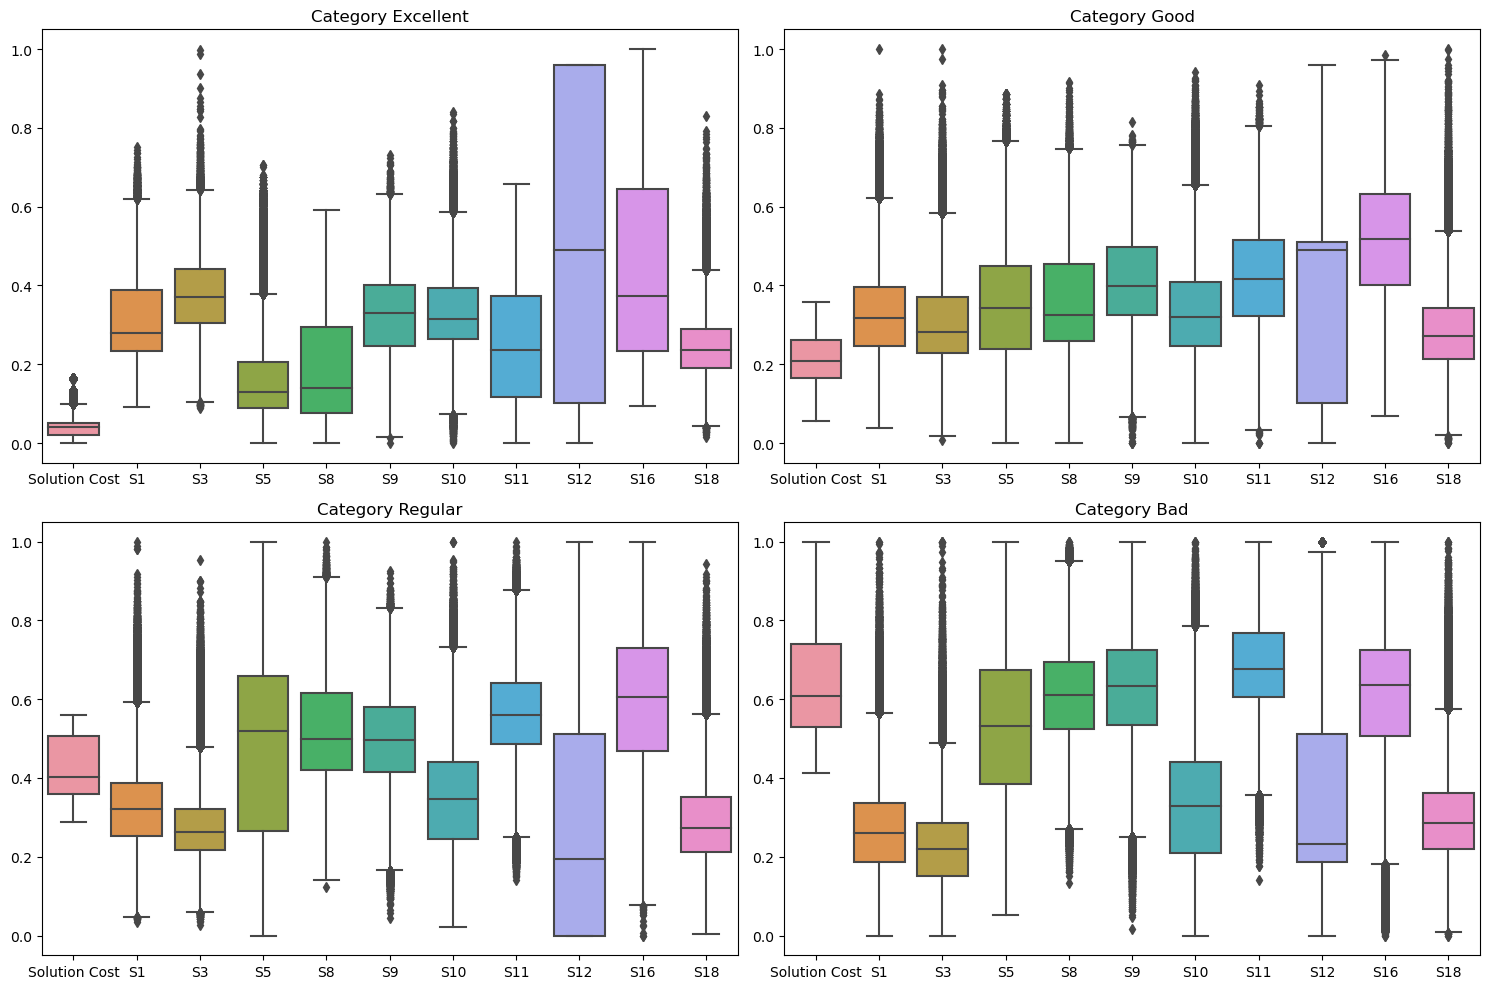

In [ ]:

# Create a box plot for each group
plt.figure(figsize=(15, 10))

# Iterate through the groups
groups = ['Excellent', 'Good', 'Regular', 'Bad']
for group in groups:
    plt.subplot(2, 2, groups.index(group) + 1)
    plt.title(f'Category {group}')

    # Filter the DataFrame for the specific group
    group_df = final_df[final_df['Cost Category'].str.contains(group)]

    # Create box plots for all columns except 'Instance Name' and 'Solution Cost'
    sns.boxplot(data=group_df.drop(columns=['Instance Name',]), orient='v')

plt.tight_layout()
plt.savefig('BxPlt_S_PerGroup.png')
plt.show()


The figure above shows that the Solution costs are distributed as  want them, their values increase from one category to another.

Besides, it can give us some insights on how each feature should be, if we want to reach a certain goal.

## Balancing of classes

After running some models, we realized, the result were being biased by the unbalanced classes, since the error was proportional to the ammount of data, so after doing the balanace of classes, we get better results, so we decide to keep it as part of the main strategy.

In [ ]:

target_column = 'Cost Category'
groups = ['Excellent', 'Good', 'Regular', 'Bad']
# Identify the category to use as a reference for balancing (e.g., 'Excellent')
reference_category = 'Excellent'

# Calculate the target number of observations for each category
target_observation_count = final_df[target_column].value_counts().loc[reference_category]
print(target_observation_count)

# Create an empty DataFrame to store the balanced data
balanced_df = final_df[final_df[target_column] == reference_category].copy()

# Iterate over each category (excluding 'Excellent')
for category in groups[1:]:
    # Get the indices of observations for the current category
    category_indices = final_df[final_df[target_column] == category].index

    # Sample the required number of observations to match the target count
    sampled_indices = np.random.choice(category_indices, size=target_observation_count, replace=True)
    # Append the sampled subset of data to the new DataFrame
    balanced_df = pd.concat([balanced_df, final_df.loc[sampled_indices]])

# Shuffle the rows to mix the categories
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balanced distribution
print(balanced_df[target_column].value_counts())


176296
Regular      176296
Good         176296
Excellent    176296
Bad          176296
Name: Cost Category, dtype: int64


# Classification Models

## Logistic Regressor

In [ ]:
# Separate the features and the response variable
X = balanced_df.drop(['Cost Category',"Instance Name","Solution Cost"], axis=1)
y = balanced_df['Cost Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

**Accuracy:** This indicates the proportion of correctly predicted instances out of the total instances evaluated.

**Precision:** Indicates the proportion of correctly predicted positive instances out of all instances predicted as positive for each class.

**Recall (Sensitivity):** Indicates the proportion of correctly predicted positive instances out of all actual positive instances for each class.

**F1-Score:** The weighted average of precision and recall. It considers both false positives and false negatives, providing a balance between precision and recall.

**Support:** The number of actual occurrences of the class in the dataset.


**Accuracy:**
The overall accuracy of the model is approximately 76.35%.

**Bad Class:**

Precision (0.87): When the model predicts an instance as "Bad," it is accurate 87% of the time.

Recall (0.81):81% of all actual instances that are "Bad" are correctly identified by the model.

F1-Score (0.84):The harmonic mean of precision and recall for the "Bad" class is 84%. It indicates a balanced performance between precision and recall, considering both false positives and false negatives.

**Excellent Class:**

Precision (0.82):When the model predicts an instance as "Excellent," it is accurate 82% of the time.

Recall (0.86):86% of all actual instances that are "Excellent" are correctly identified by the model.

F1-Score (0.84):The F1-score for "Excellent" is 84%, indicating a balanced performance in correctly identifying instances of this class.

**Good Class:**

Precision (0.69):The model correctly identifies 69% of the instances it predicts as "Good."

Recall (0.64):Out of all actual instances that are "Good," the model correctly identifies 64% of them.

F1-Score (0.67):The F1-score for "Good" is 67%. It balances precision and recall, considering both false positives and false negatives.



**Regular Class:**

Precision (0.68):When the model predicts an instance as "Regular," it is accurate 68% of the time.

Recall (0.75):75% of all actual instances that are "Regular" are correctly identified by the model.

F1-Score (0.71):The F1-score for "Regular" is 71%, indicating a balanced performance in correctly identifying instances of this class.


There are 35,326 instances in the dataset belonging to the "Regular" class.

**Global Interpretation for the linear regression:**

The "Bad" and "Excellent" classes show relatively higher precision and recall values, indicating better performance in correctly identifying instances of these classes compared to "Good" and "Regular" classes.

## Random Forest Classifier

In [ ]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)


y_pred_rf = rfc_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9685543509859115
Classification Report:
               precision    recall  f1-score   support

         Bad       0.98      0.98      0.98     35402
   Excellent       0.96      0.99      0.98     35269
        Good       0.97      0.95      0.96     35040
     Regular       0.96      0.96      0.96     35326

    accuracy                           0.97    141037
   macro avg       0.97      0.97      0.97    141037
weighted avg       0.97      0.97      0.97    141037



**Bad Class:**

Precision (0.98):When the model predicts an instance as "Bad," it is accurate 98% of the time.

Recall (0.98):98% of all actual instances that are "Bad" are correctly identified by the model.

F1-Score (0.98):The harmonic mean of precision and recall for the "Bad" class is 98%. It indicates a balanced performance between precision and recall, considering both false positives and false negatives.

**Excellent Class:**

Precision (0.97):When the model predicts an instance as "Excellent," it is accurate 97% of the time.

Recall (0.99):99% of all actual instances that are "Excellent" are correctly identified by the model.

F1-Score (0.98):The F1-score for "Excellent" is 98%, indicating a balanced performance in correctly identifying instances of this class.

**Good Class:**

Precision (0.97):The model correctly identifies 97% of the instances it predicts as "Good."

Recall (0.95):Out of all actual instances that are "Good," the model correctly identifies 95% of them.

F1-Score (0.96):The F1-score for "Good" is 96%. It balances precision and recall, considering both false positives and false negatives.

**Regular Class:**

Precision (0.96):When the model predicts an instance as "Regular," it is accurate 96% of the time.

Recall (0.96):96% of all actual instances that are "Regular" are correctly identified by the model.

F1-Score (0.96):The F1-score for "Regular" is 96%, indicating a balanced performance in correctly identifying instances of this class.

**Global Interpretation for the Random Forest:**
The model showcases high precision, recall, and F1-score values across all classes, indicating robust performance in correctly identifying instances for each class.

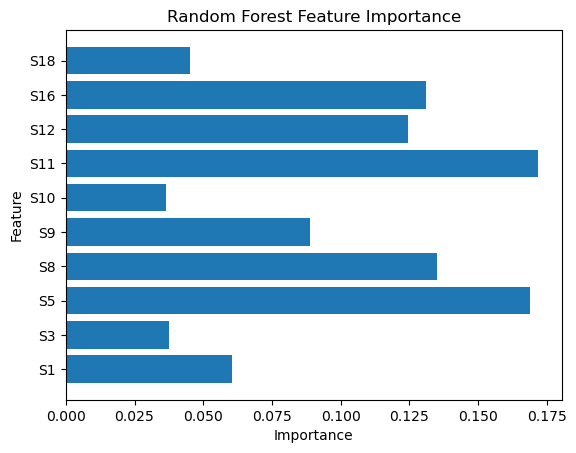

In [ ]:
# Random Forest: Get the importance of the features
feature_importances = rf_model.feature_importances_

# Vizualise the degree of importance of each feature
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Based on the figure above, one can say, that the random forest, takes conciders all features, but while allocating different importance level to the features, the lowest being allocated to S10 with a value aproximatly equal to 0.025 and the highest equalling a value of 0.175 for S11.

Consequently, what one can say, is that, when classifiying the results, the model conciders all input  feature. However, it gives a higher improtance to S11, S5, and subsequently,  S16, S12 and S8. When one goes back to the problem description, one can notice that these are measures of distance. This means, that when one wants to classify  a solution for the Capacitated Vehicule Rooting problem, it can be interresting to take a look at these measures of distance first.

## Model Validation

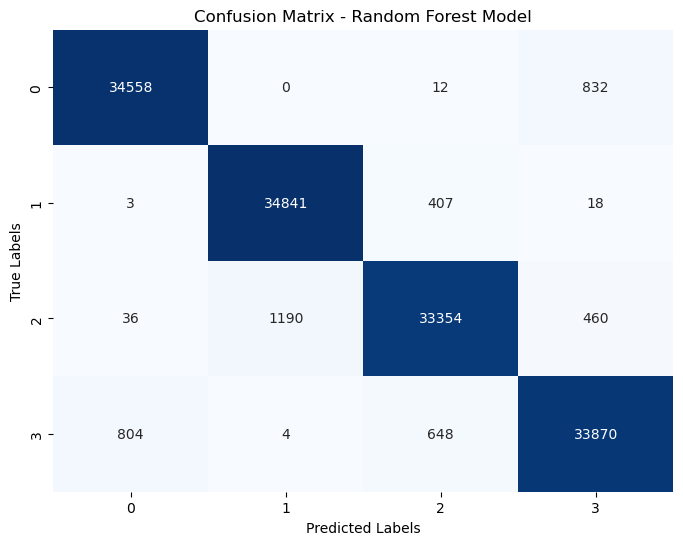

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

The above confusion matrix, confirms that the results gotten with the random forest are quiet good.
It also shows that there are some missclassified cases, but the proportion of these compared to the well classified ones is almost neglectable.
With more time, one can find a solution to go beyond this missclassification



In [ ]:
#Manual Cross Validation with a bigger portion of data to check generalization
#Separe the train and test datasets
target_value= "Cost Category"
sampled_fcv,_  = train_test_split(balanced_df, test_size=.05, stratify=balanced_df['Instance Name'],random_state=76)
Xv = sampled_fcv.drop([target_value, "Instance Name", "Solution Cost"], axis=1)
yv = sampled_fcv[target_value]

#Split the data into training and testing sets
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.6, random_state=83)
yv_predcv = rfc_model.predict(Xv_test)#This can be changed by any model, to apply the validation
#Metrics
print("Accuracy:", accuracy_score(yv_test, yv_predcv))
print("Classification Report:\n", classification_report(yv_test, yv_predcv))

### Neuronal network Test

Neural network implemented for the classification. But being computationnally heavy, the results of this one seems to be bad in general, so **we decide to continue with the random forest Only**.

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming 'final_df' is your processed DataFrame
# Replace with your actual column names
feature_columns = ['S1', 'S3', 'S5', 'S8', 'S9', 'S10', 'S11', 'S12', 'S16', 'S18']
target_column = 'Cost Category'

# Select features and target variable
X = balanced_df[feature_columns]
y = balanced_df[target_column]

# Convert categorical target variable to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert Pandas DataFrame to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the MLP model with one hidden layer
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Define a range of learning rates, loss criteria, and optimizers
learning_rates = [ 0.01] #after analysis with .001 .1
criteria = [ nn.CrossEntropyLoss()] # after analysis with NNLoss
optimizers = [optim.Adam] #After comparison with SDG

# Training the model with different configurations
for lr in learning_rates:
    for criterion in criteria:
        for optimizer_class in optimizers:
            NNclas_model = MLPModel(X_train.shape[1], 9 , 4)  # Iterations with 1 and 2 hidden layers,
            optimizer = optimizer_class(NNclas_model.parameters(), lr=lr)

            # Print the current configuration
            print(f"\nTraining with Learning Rate: {lr}, Criterion: {criterion}, Optimizer: {optimizer_class.__name__}\n")

            # Training loop
            epochs = 500
            print_interval = 20  # Set the interval for printing information
            for epoch in range(epochs):
                optimizer.zero_grad()
                outputs = NNclas_model(X_train)
                loss = criterion(outputs, y_train)
                loss.backward()
                optimizer.step()

                # Print information at each 10 epochs
                if (epoch + 1) % print_interval == 0 or epoch == epochs - 1:
                    with torch.no_grad():
                        test_outputs = NNclas_model(X_test)
                        _, predicted = torch.max(test_outputs, 1)
                        accuracy = accuracy_score(y_test, predicted.numpy())
                        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, MLP Accuracy on Test Set: {accuracy}")



Training with Learning Rate: 0.01, Criterion: CrossEntropyLoss(), Optimizer: Adam

Epoch [20/500], Loss: 1.2505, MLP Accuracy on Test Set: 0.43713351815481044
Epoch [40/500], Loss: 1.0138, MLP Accuracy on Test Set: 0.5832653842608677
Epoch [60/500], Loss: 0.8719, MLP Accuracy on Test Set: 0.6118607174003985
Epoch [80/500], Loss: 0.8004, MLP Accuracy on Test Set: 0.641413246169445
Epoch [100/500], Loss: 0.7605, MLP Accuracy on Test Set: 0.6594227046803322
Epoch [120/500], Loss: 0.7318, MLP Accuracy on Test Set: 0.672284577805824
Epoch [140/500], Loss: 0.7070, MLP Accuracy on Test Set: 0.6842034359777931
Epoch [160/500], Loss: 0.6839, MLP Accuracy on Test Set: 0.6973063805951629
Epoch [180/500], Loss: 0.6627, MLP Accuracy on Test Set: 0.7112247140821203
Epoch [200/500], Loss: 0.6444, MLP Accuracy on Test Set: 0.7235051794919064
Epoch [220/500], Loss: 0.6285, MLP Accuracy on Test Set: 0.7338074406006935
Epoch [240/500], Loss: 0.6142, MLP Accuracy on Test Set: 0.7420676843665137
Epoch [26